# SALARY PREDICTION 

#### Given a dataset which captures gross salary from July 2013 to June 2014 and includes only those employees who were employed on june 2014. Predict salaries for employees in Baltimore


## Outline
1. Import dataset
2. Data cleaning and data preparation 
3. Exploratory data analysis
4. Feature Engineering
5. Train Test split
6. Model building
7. Model evaluation

In [ ]:
#Import libararies for analysis
import numpy as np
import pandas as pd

#Import libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#Import libararies for train test split
from sklearn.model_selection import train_test_split

#Import libararies for scaling
from sklearn.preprocessing import StandardScaler

#Import libararies for model building 
from sklearn.linear_model import LinearRegression

#Suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

#Importing the dataset
the dataset is in the csv format and can be imported using read_csv method available in pandas library

In [ ]:
salary = pd.read_csv('trainfile.csv')

In [ ]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


## Data cleaning and preparation

In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


There are 18981 rows in the dataset.

There are 7 columns in the dataset.

All columns are of type object.



It is always a good practice to work on copy of datasets instead of working on original data itself 

In [ ]:
salary_cpy = salary.copy()

In [ ]:
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
#Since Name has leading space so we are removing it
salary_cpy.columns = salary_cpy.columns.str.strip()

In [ ]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
#check null values
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [ ]:
salary_cpy = salary_cpy.dropna(subset = ['HireDate'])

salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [ ]:
#drop grosspay column
salary_cpy = salary_cpy.drop('GrossPay', axis = 1)

salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [ ]:
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02690      1
W02313      1
W02682      1
W02596      1
W02666      1
Name: AgencyID, Length: 1177, dtype: int64

There are 1177 agencies in Blatimore.
As per general understanding AgencyID represents Agency so we should have the same number of agencies as well. But after validating it seems that one agency is having multiple agency ids.

In [ ]:
#Value count for agency
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
M-R Labor Commissioner         6
Legislative Reference          5
Special City Services          4
M-R Cable & Comm               4
Name: Agency, Length: 65, dtype: int64

In [ ]:
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                   4817
POLICE OFFICER                   1866
LABORER (Hourly)                  597
EMT Firefighter Suppression       358
CROSSING GUARD                    337
                                 ... 
CABLE INSPECTION SUPERVISOR         1
ELECTRICAL MAINT TECH SUPV II       1
BILLING SECTION SUPERVISOR          1
E-DISCOVERY COORDINATOR             1
CHIEF JUDGE ORPHANS' COURT          1
Name: JobTitle, Length: 1073, dtype: int64

In [ ]:
#value counts on HireDate
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
04/30/1987       1
12/08/1988       1
04/13/1993       1
11/25/2005       1
01/24/1975       1
Name: HireDate, Length: 4737, dtype: int64

#### Removing $ from annual salary and converting it into float

In [ ]:
salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [ ]:
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
35509.0       1
25945.0       1
51889.0       1
39600.0       1
86400.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [ ]:
salary_cpy['HireDay'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[3:5])))
salary_cpy['HireMonth'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[0:2])))
salary_cpy['HireYear'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[6:])))

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [ ]:
#trimming all categorical columns to make sure there are no leading and trailing spaces 
#and no double spaces between words

salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).strip().replace("  "," "))

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


It can be seen that some of the titles are in upper case, some with lower and with mix of both which might affect analysis. So converting them to uppercase and also converting agency and agencyid 

In [ ]:
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).upper())
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).upper())
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).upper())

In [ ]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013


In [ ]:
salary_cpy.shape

(18911, 9)

The last thing left in data preparation is outlier treatment. Creating a boxplot for annual salary and check for outliers

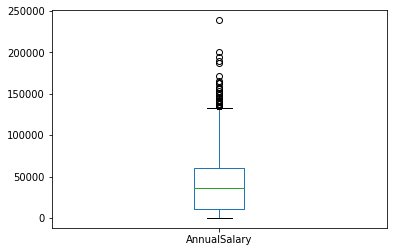

In [ ]:
salary_cpy.AnnualSalary.plot.box()

We can say there are few salaries which are way far from other salaries and they might affect the prediction so we have to eliminate them 

In [ ]:
#summary stats of annual salary
salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

delete rows whose annual salary is greater than 150000 according to boxplot

In [ ]:
salary_cpy = salary_cpy[salary_cpy['AnnualSalary'] < 140000]

In [ ]:
salary_cpy.shape

(18885, 9)

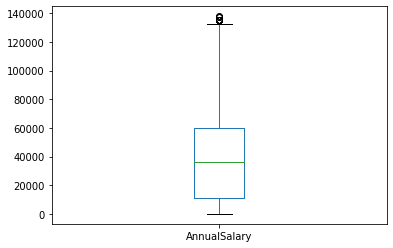

In [ ]:
salary_cpy.AnnualSalary.plot.box()

Now that we are done with the data preparation we can move on to the next step that is Exploratory Data Analysis

## Exploratory Data Analysis

Text(0.5, 1.0, 'Annual salary distribution plot')

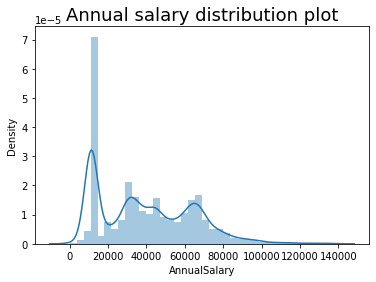

In [ ]:
#We will first check the distribution of annual salary by creating the distplot
sns.distplot(salary_cpy.AnnualSalary)
plt.title("Annual salary distribution plot", fontsize = 18)

The Data is distributed very randomly and there seems to be not many people with more than 100000 

Let us check jobs for which people are hired the most. For this we will be creating a barplot.



Text(0.5, 1.0, 'Top 10 jobs for which hiring is highest')

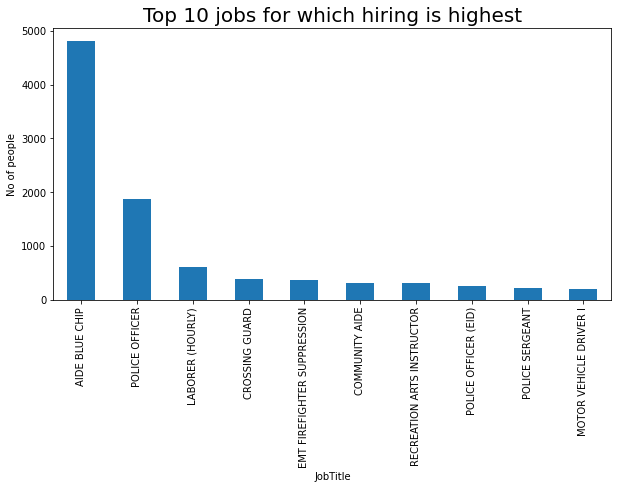

In [ ]:
plt.figure(figsize = (10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('No of people')
plt.title('Top 10 jobs for which hiring is highest', fontsize = 20)

This plot shows more number of people were hired for Aide Blue Chip followed by job of Police Officer. Other than these two all other job titles have less than 1000 workers. 

Let us check the top 10 jobs that fetch highest salaries

Text(0.5, 1.0, 'Top 10 highly paid jobs')

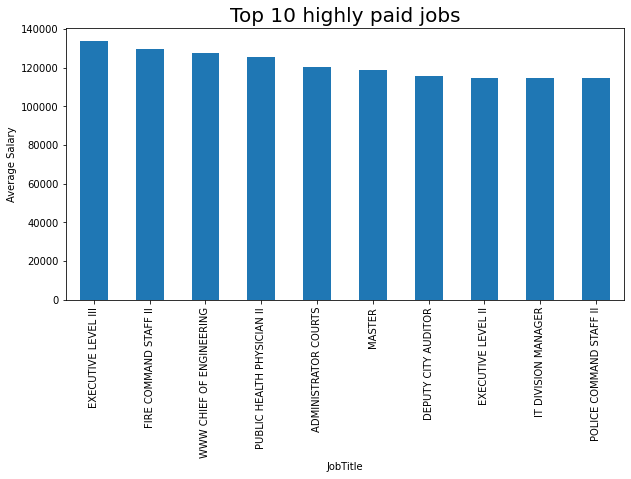

In [ ]:
plt.figure(figsize = (10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('Average Salary')
plt.title('Top 10 highly paid jobs', fontsize = 20)

Let us check number of jobs whose average pay is more than total average salary

In [ ]:
# Find mean salary
mean_sal = salary_cpy.AnnualSalary.mean()

# Number of jobs that paying more than mean salary
good_paying_jobs = salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_paying_jobs[good_paying_jobs.AnnualSalary > mean_sal]['JobTitle'].count()

797

In [ ]:
good_paying_jobs

,JobTitle,AnnualSalary
0,911 LEAD OPERATOR,47886.000000
1,911 OPERATOR,42835.743590
2,911 OPERATOR SUPERVISOR,54797.500000
3,ACCOUNT EXECUTIVE,42960.000000
4,ACCOUNTANT I,46316.642857
...,...,...
1049,ZONING ADMINISTRATOR,82100.000000
1050,ZONING APPEALS ADVISOR BMZA,59274.000000
1051,ZONING ENFORCEMENT OFFICER,62000.000000
1052,ZONING EXAMINER I,43674.000000


Let us check the top 10 agencies and agencyid with highest number of employees 

Text(0.5, 1.0, 'top agencies with highest number of employees')

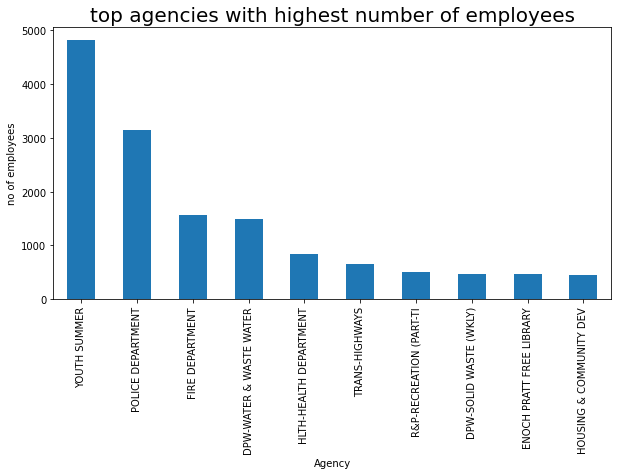

In [ ]:
plt.figure(figsize = (10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('no of employees')
plt.title('top agencies with highest number of employees', fontsize = 20)

Text(0.5, 1.0, 'top agencies with highest number of employees')

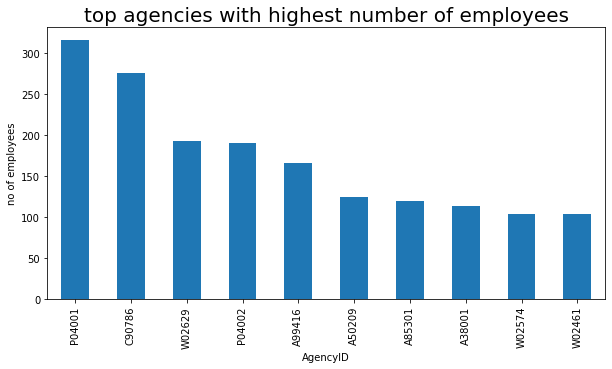

In [ ]:
plt.figure(figsize = (10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel('no of employees')
plt.title('top agencies with highest number of employees', fontsize = 20)

Let us check people hired in which year have lowest salaries. This is to check if as the hire year increases the salary decreases. Because, people have higher experience salary should be high.

Text(0.5, 1.0, 'average salary of employees based on hire year')

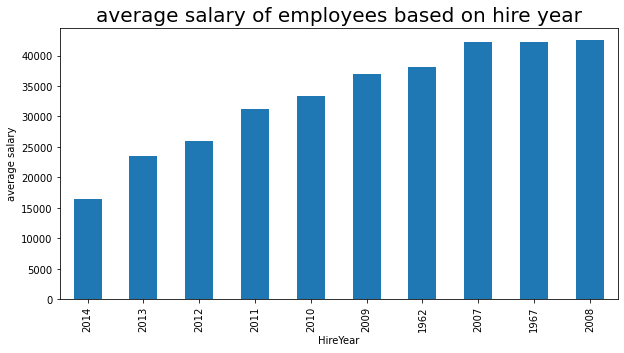

In [ ]:
plt.figure(figsize = (10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel('average salary')
plt.title('average salary of employees based on hire year', fontsize = 20)

The trend above suggests that the salary of the employees increases with experience in the company. Now, let us calculate experience in days with agency.

Text(0.5, 1.0, 'avg salary of employees based on hire month')

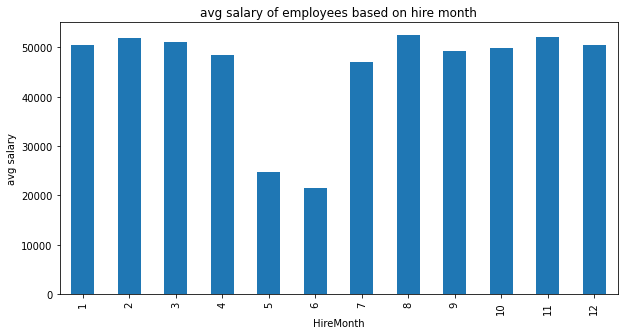

In [ ]:
#checking if month has any such effect 
plt.figure(figsize = (10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('avg salary')
plt.title('avg salary of employees based on hire month')

Text(0.5, 1.0, 'number of employee hired based on hire month')

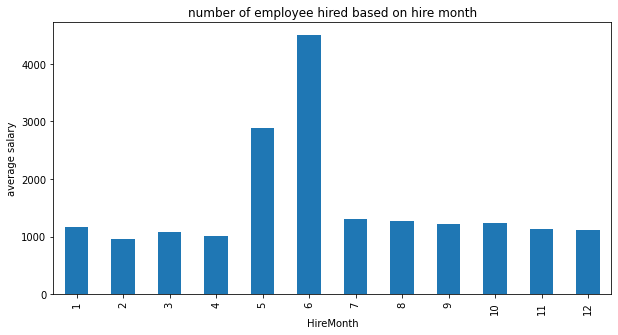

In [ ]:
#checking if month has any such effect 
plt.figure(figsize = (10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel('average salary')
plt.title('number of employee hired based on hire month')

We can conclude that more employees are hired in the month of May and june but they have relatively lower average salaries

Let us check if there is any relation between any of the numerical variable using pairplot

<Figure size 720x360 with 0 Axes>

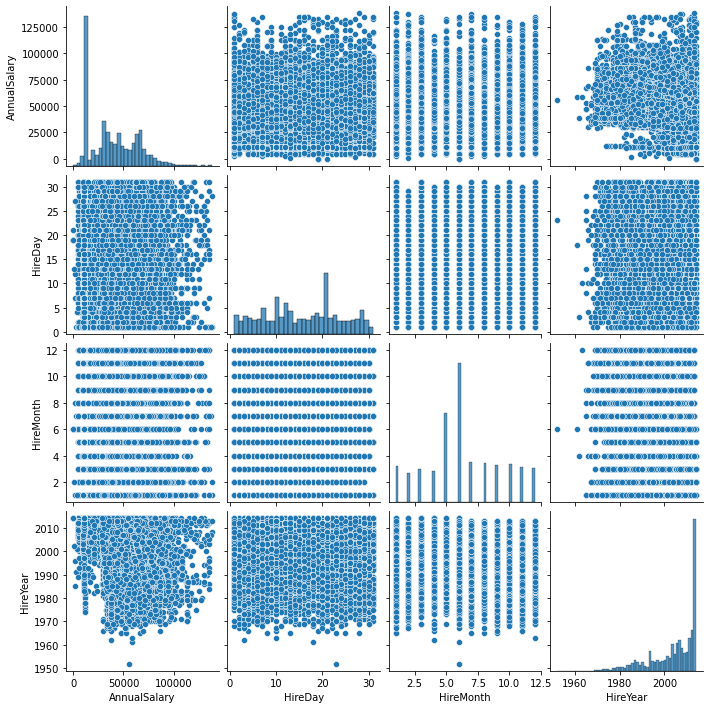

In [ ]:
plt.figure(figsize = (10,5))
sns.pairplot(salary_cpy)

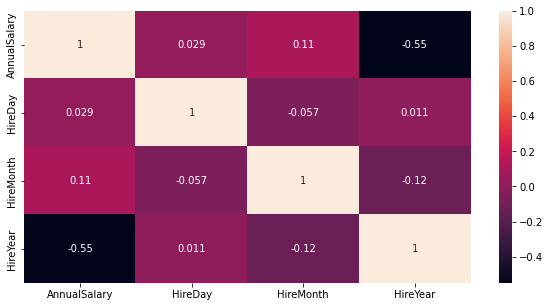

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(salary_cpy.corr(),annot = True)

# Feature Engineering



In [ ]:
# create a copy of the dataframe
salary_master = salary_cpy.copy()

We are using mean encoding here as the number of labels of categorical variables are very high and if we use any other method then that will create unnecessary variables or labelling might not be appropriate.

In [ ]:
#Apply mean encoding for job title
mean_job = salary_master.groupby('JobTitle')['AnnualSalary'].mean()
salary_master['JobTitle'] = salary_master['JobTitle'].map(mean_job)
salary_master['JobTitle'] 

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18885, dtype: float64

In [ ]:
#Apply mean encoding for agency
mean_agency = salary_master.groupby('Agency')['AnnualSalary'].mean()
salary_master['Agency'] = salary_master['Agency'].map(mean_agency)
salary_master['Agency'] 

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61481.005417
             ...     
18976    11313.967200
18977    11313.967200
18978    61481.005417
18979    61481.005417
18980    42565.513078
Name: Agency, Length: 18885, dtype: float64

In [ ]:
#Apply mean encoding for agencyid
mean_agencyid = salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID'] = salary_master['AgencyID'].map(mean_agencyid)
salary_master['AgencyID'] 

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18885, dtype: float64

In [ ]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18885 non-null  object 
 1   JobTitle      18885 non-null  float64
 2   AgencyID      18885 non-null  float64
 3   Agency        18885 non-null  float64
 4   HireDate      18885 non-null  object 
 5   AnnualSalary  18885 non-null  float64
 6   HireDay       18885 non-null  int64  
 7   HireMonth     18885 non-null  int64  
 8   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [ ]:
#drop name and hiredate column
salary_master = salary_master.drop(['HireDate','Name'], axis = 1)
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18885 non-null  float64
 1   AgencyID      18885 non-null  float64
 2   Agency        18885 non-null  float64
 3   AnnualSalary  18885 non-null  float64
 4   HireDay       18885 non-null  int64  
 5   HireMonth     18885 non-null  int64  
 6   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


# Train-Test Split

In [ ]:
#split data into train and test using train-test split
salary_train, salary_test = train_test_split(salary_master, train_size = 0.7, random_state = 10)


In [ ]:
print(salary_train.shape)
print(salary_test.shape)

(13219, 7)
(5666, 7)


In [ ]:
#divide train set into dependent and independent variables
y_train = salary_train.pop('AnnualSalary')
x_train = salary_train


#divide test set into dependent and independent variables
y_test = salary_test.pop('AnnualSalary')
x_test = salary_test


In [ ]:
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,21570.423841,21474.446429,31494.602740,26,3,2007
7529,11313.967200,11310.000000,11313.967200,16,6,2014
15366,11313.967200,11310.000000,11313.967200,10,6,2013
3237,11313.967200,11310.000000,11313.967200,11,6,2009
16659,11313.967200,11310.000000,11313.967200,19,6,2014
...,...,...,...,...,...,...
9453,11313.967200,11310.000000,11313.967200,21,5,2014
7371,29925.666667,33754.400000,31594.490526,4,3,2002
17822,34098.128205,38263.434783,31494.602740,27,5,1999
7373,42275.081081,62661.900000,62661.900000,6,10,1969


## Feature Scaling

In [ ]:
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,-0.739384,-0.813601,-0.382481,1.220063,-1.143251,0.282241
7529,-1.162446,-1.272054,-1.345816,0.026686,-0.124696,0.955021
15366,-1.162446,-1.272054,-1.345816,-0.689340,-0.124696,0.858910
3237,-1.162446,-1.272054,-1.345816,-0.570003,-0.124696,0.474464
16659,-1.162446,-1.272054,-1.345816,0.384699,-0.124696,0.955021
...,...,...,...,...,...,...
9453,-1.162446,-1.272054,-1.345816,0.623375,-0.464215,0.955021
7371,-0.394744,-0.259730,-0.377713,-1.405367,-1.143251,-0.198316
17822,-0.222637,-0.056356,-0.382481,1.339401,-0.464215,-0.486650
7373,0.114649,1.044104,1.105307,-1.166691,1.233377,-3.369991


In [ ]:
x_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.321900e+04,1.321900e+04,1.321900e+04,1.321900e+04,1.321900e+04,1.321900e+04
mean,1.054960e-16,8.526730e-16,2.849421e-16,1.531228e-16,-8.850541e-17,-7.982991e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.546632e+00,-1.691969e+00,-1.397343e+00,-1.763380e+00,-1.822288e+00,-4.138882e+00
25%,-1.162446e+00,-1.272054e+00,-1.345816e+00,-8.086782e-01,-4.642147e-01,-5.827611e-01
50%,-1.457188e-01,9.319493e-02,1.459947e-01,2.668601e-02,-1.246964e-01,2.822413e-01
75%,8.700324e-01,9.033706e-01,1.048937e+00,7.427125e-01,8.938587e-01,8.589095e-01
max,3.889902e+00,2.886953e+00,1.959063e+00,1.816752e+00,1.912414e+00,9.550209e-01


In [ ]:
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])


# Model Building

We are building a linear regression model 

####AN EXAMPLE

In [ ]:
example_df = pd.DataFrame({'Performance' : [1,2,3,4,5,6], 
                         'levels' : [2,5,4,6,1,3],
                         'Target' : [100,300,200,600,200,500]})
example_df

,Performance,levels,Target
0,1,2,100
1,2,5,300
2,3,4,200
3,4,6,600
4,5,1,200
5,6,3,500


In [ ]:
example_lr = LinearRegression()
example_model = example_lr.fit(example_df[['Performance','levels']], example_df['Target'])

In [ ]:
# R square
example_model.score(example_df[['Performance','levels']], example_df['Target'])

0.8579646017699115

In [ ]:
  print(example_lr.coef_)
  print(example_lr.intercept_)

[70.83333333 75.83333333]
-196.66666666666669


In [ ]:
example_lr.predict([[6,3]])     #predicting target if performance was 6 and level was 3

array([455.83333333])

####COMING ONTO OUR ACTUAL DATA

In [ ]:
lr = LinearRegression()

salary_reg = lr.fit(x_train, y_train)


In [ ]:
salary_reg.score(x_train, y_train)

0.9652498067695455

In [ ]:
salary_reg.score(x_test, y_test)

0.9647165830506235

**Even though our model performs well on train data that doesn't mean the model is good. The model should equally perform well on the test data i.e the data that model has not encountered yet. Only then the model is considered a good model.**

**1) If the model is just performing good on training data and not on test data then we can say overfitting is there**

**2) If the model doesn't perform good on either train data and test data then we can say undefitting is there**

**Now overfitting can be treated by regularization.** 



**Hyperparameter tuning**


In [ ]:
  print(salary_reg.coef_)
  print(salary_reg.intercept_)

[22107.57351879  2772.01552827 -1638.49731197   -78.87693955
  -103.80442772 -2104.19216623]
39505.76539904681


In [ ]:
y_pred = salary_reg.predict(x_test)

In [ ]:
y_pred 

array([58719.19937463, 10475.32610913, 10576.42843556, ...,
       57516.60452052, 65294.01185641, 11178.57496343])

In [ ]:
y_test

9797     59409.0
4541     11310.0
2860     11310.0
8139     66231.0
2876     40303.0
          ...   
11213    40954.0
3366     69900.0
11606    57900.0
14382    65480.0
394      11310.0
Name: AnnualSalary, Length: 5666, dtype: float64

**1) Out of all features agencyid, jobtitle, hireyear are the major driver for explaining variance in annual salary
because they have higher coeff value**

**2) Other than first two features, all features are negatively correlated with annual salary**